# 01. 선형회귀모델
## 1-1. 단일선형회귀

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Epoch [100/1000], Loss:  5.4814
Epoch [200/1000], Loss:  5.3536
Epoch [300/1000], Loss:  5.2381
Epoch [400/1000], Loss:  5.1335
Epoch [500/1000], Loss:  5.0388
Epoch [600/1000], Loss:  4.9530
Epoch [700/1000], Loss:  4.8754
Epoch [800/1000], Loss:  4.8051
Epoch [900/1000], Loss:  4.7414
Epoch [1000/1000], Loss:  4.6838


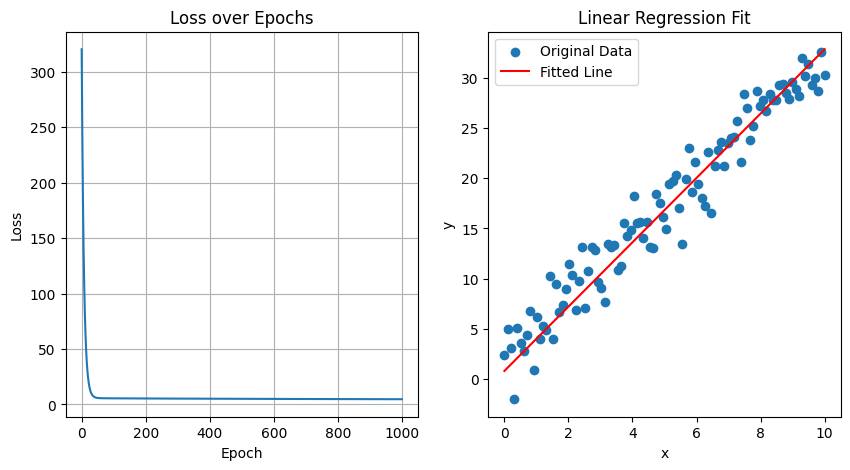

Model Parameters: 
linear.weight: tensor([[3.1988]])
linear.bias: tensor([0.8284])


In [2]:
# 1. 데이터 생성
x = torch.linspace(0,10,100).view(-1, 1) # 입력 데이터
y = 3 * x + 2 + torch.randn(100, 1) * 2

# 2. 모델 정의
class LinearRegressionModel(nn.Module):
  def __init__(self,):
    super().__init__()
    self.linear = nn.Linear(1,1) # 입력 1개, 출력 1개
    
  def forward(self, x):
    return self.linear(x)
  
model = LinearRegressionModel()

# 3. 손실 함수, 옵티마이저 정의
criterion = nn.MSELoss() # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.001) # 확률적 경사 하강법

# 4. 가중치 업데이트
epochs = 1000 # 학습 반복 횟수
losses = []

for epoch in range(epochs):
  optimizer.zero_grad() # 기울기 초기화
  outputs = model(x) # 예측값 계산
  loss = criterion(outputs, y) # 손실 계산
  loss.backward() # 역전파
  optimizer.step() # 가중치 업데이트
  
  losses.append(loss.item())
  
  # 100번에 한번씩 로그 출력
  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item(): .4f}")
  
# 5. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), color="r", label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

print("Model Parameters: ")
for name, param in model.named_parameters():
  print(f"{name}: {param.data}")




### 훈련 데이터, 평가데이터 분리

Epoch [100/1000], Loss:  4.6933
Epoch [200/1000], Loss:  4.6283
Epoch [300/1000], Loss:  4.5694
Epoch [400/1000], Loss:  4.5159
Epoch [500/1000], Loss:  4.4673
Epoch [600/1000], Loss:  4.4231
Epoch [700/1000], Loss:  4.3829
Epoch [800/1000], Loss:  4.3464
Epoch [900/1000], Loss:  4.3133
Epoch [1000/1000], Loss:  4.2831
최종 Test Loss:  3.4448


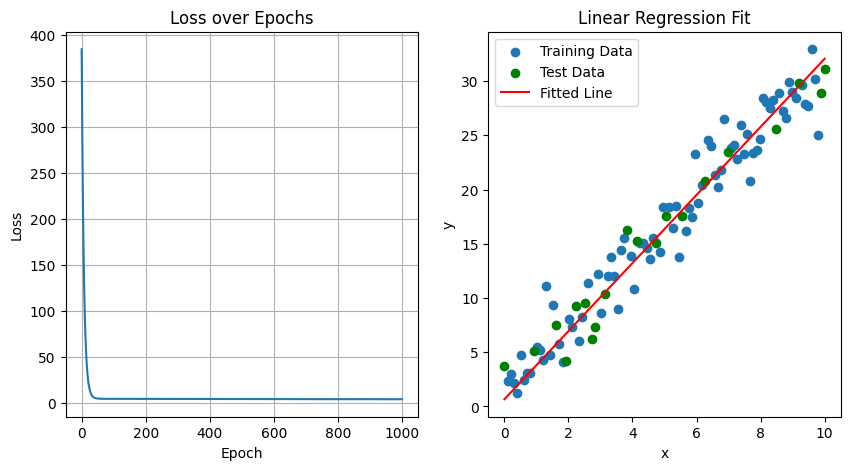

In [3]:
# 1. 데이터 생성
x = torch.linspace(0,10,100).view(-1, 1) # 입력 데이터
y = 3 * x + 2 + torch.randn(100, 1) * 2

# Train / Test set 분리 (8:2로 분리)
num_train = int(len(x) * 0.8)
indices = torch.randperm(len(x))
train_idx, test_idx = indices[:num_train], indices[num_train:]

x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

# 2. 모델 정의
class LinearRegressionModel(nn.Module):
  def __init__(self,):
    super().__init__()
    self.linear = nn.Linear(1,1) # 입력 1개, 출력 1개
    
  def forward(self, x):
    return self.linear(x)
  
model = LinearRegressionModel()

# 3. 손실 함수, 옵티마이저 정의
criterion = nn.MSELoss() # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.001) # 확률적 경사 하강법

# 4. 가중치 업데이트
epochs = 1000 # 학습 반복 횟수
losses = []

for epoch in range(epochs):
  optimizer.zero_grad() # 기울기 초기화
  outputs = model(x_train) # 예측값 계산
  loss = criterion(outputs, y_train) # 손실 계산
  loss.backward() # 역전파
  optimizer.step() # 가중치 업데이트
  
  losses.append(loss.item())
  
  # 100번에 한번씩 로그 출력
  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item(): .4f}")
    
# 5. 테스트 데이터 평가
with torch.no_grad():
  test_output = model(x_test)
  test_loss = criterion(test_output, y_test)
print(f"최종 Test Loss: {test_loss.item(): .4f}")
  
# 6. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
plt.subplot(1, 2, 2)
plt.scatter(x_train.numpy(), y_train.numpy(), label="Training Data")
plt.scatter(x_test.numpy(), y_test.numpy(), label="Test Data", color="g")
plt.plot(x.numpy(), model(x).detach().numpy(), color="r", label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

# print("Model Parameters: ")
# for name, param in model.named_parameters():
#   print(f"{name}: {param.data}")




## 1-2. 다중선형회귀

Epoch [100/1000], Loss:  5.6683
Epoch [200/1000], Loss:  4.7681
Epoch [300/1000], Loss:  4.2008
Epoch [400/1000], Loss:  3.7525
Epoch [500/1000], Loss:  3.3972
Epoch [600/1000], Loss:  3.1157
Epoch [700/1000], Loss:  2.8924
Epoch [800/1000], Loss:  2.7154
Epoch [900/1000], Loss:  2.5748
Epoch [1000/1000], Loss:  2.4632


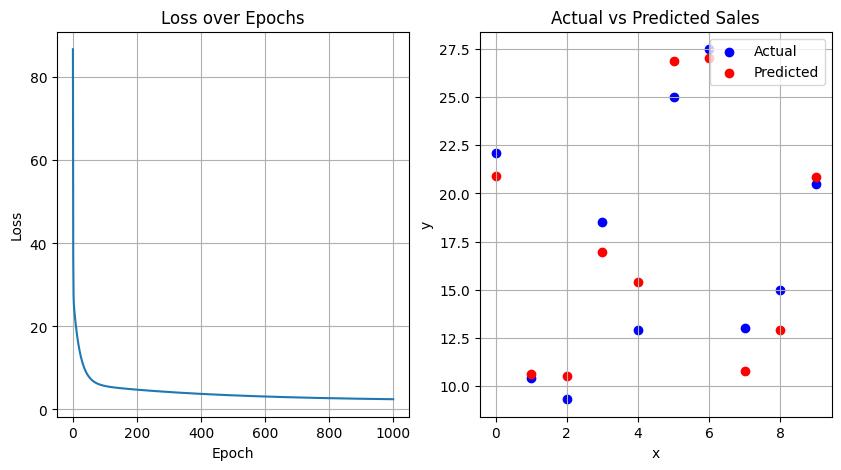

Model Parameters:
linear.weight: tensor([[0.2096, 0.3320, 0.0538]])
linear.bias: tensor([0.5174])


In [5]:
# 1. 데이터 입출력 정의
x = torch.tensor([[50.0, 25.0, 30.0],
                  [10.0, 20.0, 25.0],
                  [5.0, 22.0, 30.0],
                  [30.0, 26.0, 28.0],
                  [40.0, 15.0, 28.0],
                  [60.0, 35.0, 40.0],
                  [70.0, 30.0, 35.0],
                  [20.0, 15.0, 20.0],
                  [25.0, 18.0, 22.0],
                  [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9], 
                  [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

# 2. 모델 정의
class MultipleLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1)

  def forward(self, x):
    return self.linear(x)
  
model = MultipleLinearRegression()

# 3. 손실함수 정의
criterion = nn.MSELoss()

# 4. 기울기 업데이트(학습)
optimizer = optim.SGD(model.parameters(), lr=0.0001)
epochs = 1000
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()
  outputs = model(x)
  loss = criterion(outputs, y)
  loss.backward()
  optimizer.step()
  
  losses.append(loss.item())
  
  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item(): .4f}")
    
# 5. 결과 시각화
plt.figure(figsize=(10, 5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
predicted = model(x).detach().numpy()
actual = y.numpy()

plt.subplot(1, 2, 2)
plt.scatter(range(len(actual)), actual, label="Actual", color="b")
plt.scatter(range(len(predicted)), predicted, label="Predicted", color="r")
plt.title("Actual vs Predicted Sales")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

plt.show()


print("Model Parameters:")
for name, param in model.named_parameters():
  print(f"{name}: {param.data}")
